In [ ]:
!cd /content/dataset
!pip install unrar
!unrar x /content/dataset/dataset.rar


UNRAR 6.11 beta 1 freeware      Copyright (c) 1993-2022 Alexander Roshal


Extracting from /content/dataset/dataset.rar

Creating    Hamzedoost_Taraneh_Alidoosti                              OK
Extracting  Hamzedoost_Taraneh_Alidoosti/11717.jpg                         0%  OK 
Extracting  Hamzedoost_Taraneh_Alidoosti/16542836824a4c.jpg                0%  OK 
Extracting  Hamzedoost_Taraneh_Alidoosti/221110085657-taraneh-alidoosti-file-052622.jpg       0%  OK 
Extracting  Hamzedoost_Taraneh_Alidoosti/2354152.jpg                       1%  OK 
Extracting  Hamzedoost_Taraneh_Alidoosti/2909166.jpg                       1%  OK 
Extracting  Hamzedoost_Taraneh_Alidoosti/60d730f27ea5a.jpg                 1%  OK 
Extracting  Hamzedoost_Taraneh_Alidoosti/62948208_64659333adbaa.jpg        1%  OK 
Extracting  Hamzedoost_Taraneh_Alidoosti/63b64de00e457.webp                1%  OK 
Extracting  Hamzedoost_Taraneh_Alidoosti/cafeh.baz

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import tensorflow as tf
# Enable GPU dynamic memory allocation
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, True)

In [ ]:
import os
import cv2
from keras.preprocessing.image import ImageDataGenerator
from tqdm import tqdm

# Initialize the image data generator with various augmentations
datagen = ImageDataGenerator(
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Define the base directory where subfolders with images are located
base_dir = '/content/dataset'  # Update this path to your dataset folder

# Loop over each subdirectory in the base directory
for subdir in tqdm(os.listdir(base_dir)):
    subdir_path = os.path.join(base_dir, subdir)

    # Check if the path is indeed a directory
    if os.path.isdir(subdir_path):
        images = []
        filenames = []

        # Load images
        for filename in os.listdir(subdir_path):
            if filename.lower().endswith(('.jpg', '.jpeg', '.png')):  # Check for image formats
                img_path = os.path.join(subdir_path, filename)
                img = cv2.imread(img_path)
                if img is not None:
                    images.append(img)
                    filenames.append(filename)

        # Calculate how many augmentations are needed per image
        num_images = len(images)
        if num_images == 0:
            print(f"No images found in {subdir_path}. Skipping this directory.")
            continue

        augmentations_per_image = max(0, (300 - num_images) // num_images)

        # Perform the augmentations
        for i, img in enumerate(images):
            img = img.reshape((1,) + img.shape)  # Reshape the image for the ImageDataGenerator
            j = 0
            # Save augmented images in the subdir_path itself
            for batch in datagen.flow(img, batch_size=1, save_to_dir=subdir_path, save_prefix='aug', save_format='jpg'):
                j += 1
                if j >= augmentations_per_image:
                    break  # Break the loop when we reach the desired number of augmentations

print("Augmentation completed.")

 88%|████████▊ | 14/16 [07:29<01:00, 30.33s/it]

No images found in /content/dataset/.ipynb_checkpoints. Skipping this directory.


100%|██████████| 16/16 [07:44<00:00, 29.06s/it]

Augmentation completed.


In [ ]:
import os
import cv2
from tqdm import tqdm

# Define the base directory where subfolders with images are located
base_dir = '/content/dataset'  # Replace with the path to your dataset folder

# Desired size
desired_width, desired_height = 256, 256

# Loop over each subdirectory in the base directory
for subdir in tqdm(os.listdir(base_dir), desc="Processing subdirectories"):
    subdir_path = os.path.join(base_dir, subdir)

    # Check if the path is indeed a directory
    if os.path.isdir(subdir_path):

        # Loop over all files in the subdirectory
        for filename in tqdm(os.listdir(subdir_path), desc=f"Processing images in {subdir}"):
            if filename.lower().endswith(('.jpg', '.jpeg', '.png', '.bmp', '.tif', '.tiff')):
                img_path = os.path.join(subdir_path, filename)

                # Read the image from file
                img = cv2.imread(img_path)
                if img is not None:
                    # Check if the image is already the desired size
                    if img.shape[:2] == (desired_height, desired_width):
                        # Convert BGR to RGB
                        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
                    else:
                        # Resize the image
                        img = cv2.resize(img, (desired_width, desired_height), interpolation=cv2.INTER_AREA)
                        # Convert BGR to RGB after resizing
                        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

                    # Save the image back to disk in RGB format
                    cv2.imwrite(img_path, img)

print("Image processing completed.")

Processing subdirectories:  12%|█▎        | 2/16 [00:04<00:31,  2.24s/it]
Processing images in Hesamheydari-mehranghafoorian:   0%|          | 0/297 [00:00<?, ?it/s]
Processing images in Hesamheydari-mehranghafoorian:  12%|█▏        | 37/297 [00:00<00:00, 369.57it/s]
Processing images in Hesamheydari-mehranghafoorian:  26%|██▋       | 78/297 [00:00<00:00, 388.62it/s]
Processing images in Hesamheydari-mehranghafoorian:  40%|████      | 119/297 [00:00<00:00, 393.83it/s]
Processing images in Hesamheydari-mehranghafoorian:  54%|█████▍    | 160/297 [00:00<00:00, 398.67it/s]
Processing images in Hesamheydari-mehranghafoorian:  67%|██████▋   | 200/297 [00:00<00:00, 387.52it/s]
Processing images in Hesamheydari-mehranghafoorian:  81%|████████  | 241/297 [00:00<00:00, 391.82it/s]
Processing images in Hesamheydari-mehranghafoorian: 100%|██████████| 297/297 [00:00<00:00, 388.12it/s]
Processing subdirectories:  44%|████▍     | 7/16 [00:24<00:38,  4.24s/it]
Processing images in Hamzedoost_Taraneh_A

Image processing completed.


In [ ]:
import matplotlib.pyplot as plt
from datetime import datetime
import tensorflow as tf
import numpy as np
import imghdr
import cv2
import os

In [ ]:
DATA_DIR = "/content/dataset"
ACCEPTED_FORMAT = ["jpeg" , "jpg" , "png" , "bmp"]

# removing dodgy images
for image_class in os.listdir(DATA_DIR):
    for file_path in os.listdir(os.path.join(DATA_DIR , image_class)):

        image_path = os.path.join(DATA_DIR , image_class , file_path)

        try:
            img = cv2.imread(image_path)
            data_type = imghdr.what(image_path)

            if data_type not in ACCEPTED_FORMAT :
                print("the image with " + str(image_path) + "is not supported , will be removed " )
                os.remove(image_path)

        except Exception as e:
            print(f"the image {image_path} could not be read")
            os.remove(image_path)

the image with /content/dataset/Hamzedoost_Taraneh_Alidoosti/63b64de00e457.webpis not supported , will be removed 
the image with /content/dataset/SaeedZare-AlirezaBeiranvand/043424600_1528290271-Alireza_Beiranvand.webpis not supported , will be removed 


In [ ]:
base_data = tf.keras.utils.image_dataset_from_directory("/content/dataset")
data_iter = base_data.as_numpy_iterator()
batch = data_iter.next()

Found 4362 files belonging to 15 classes.


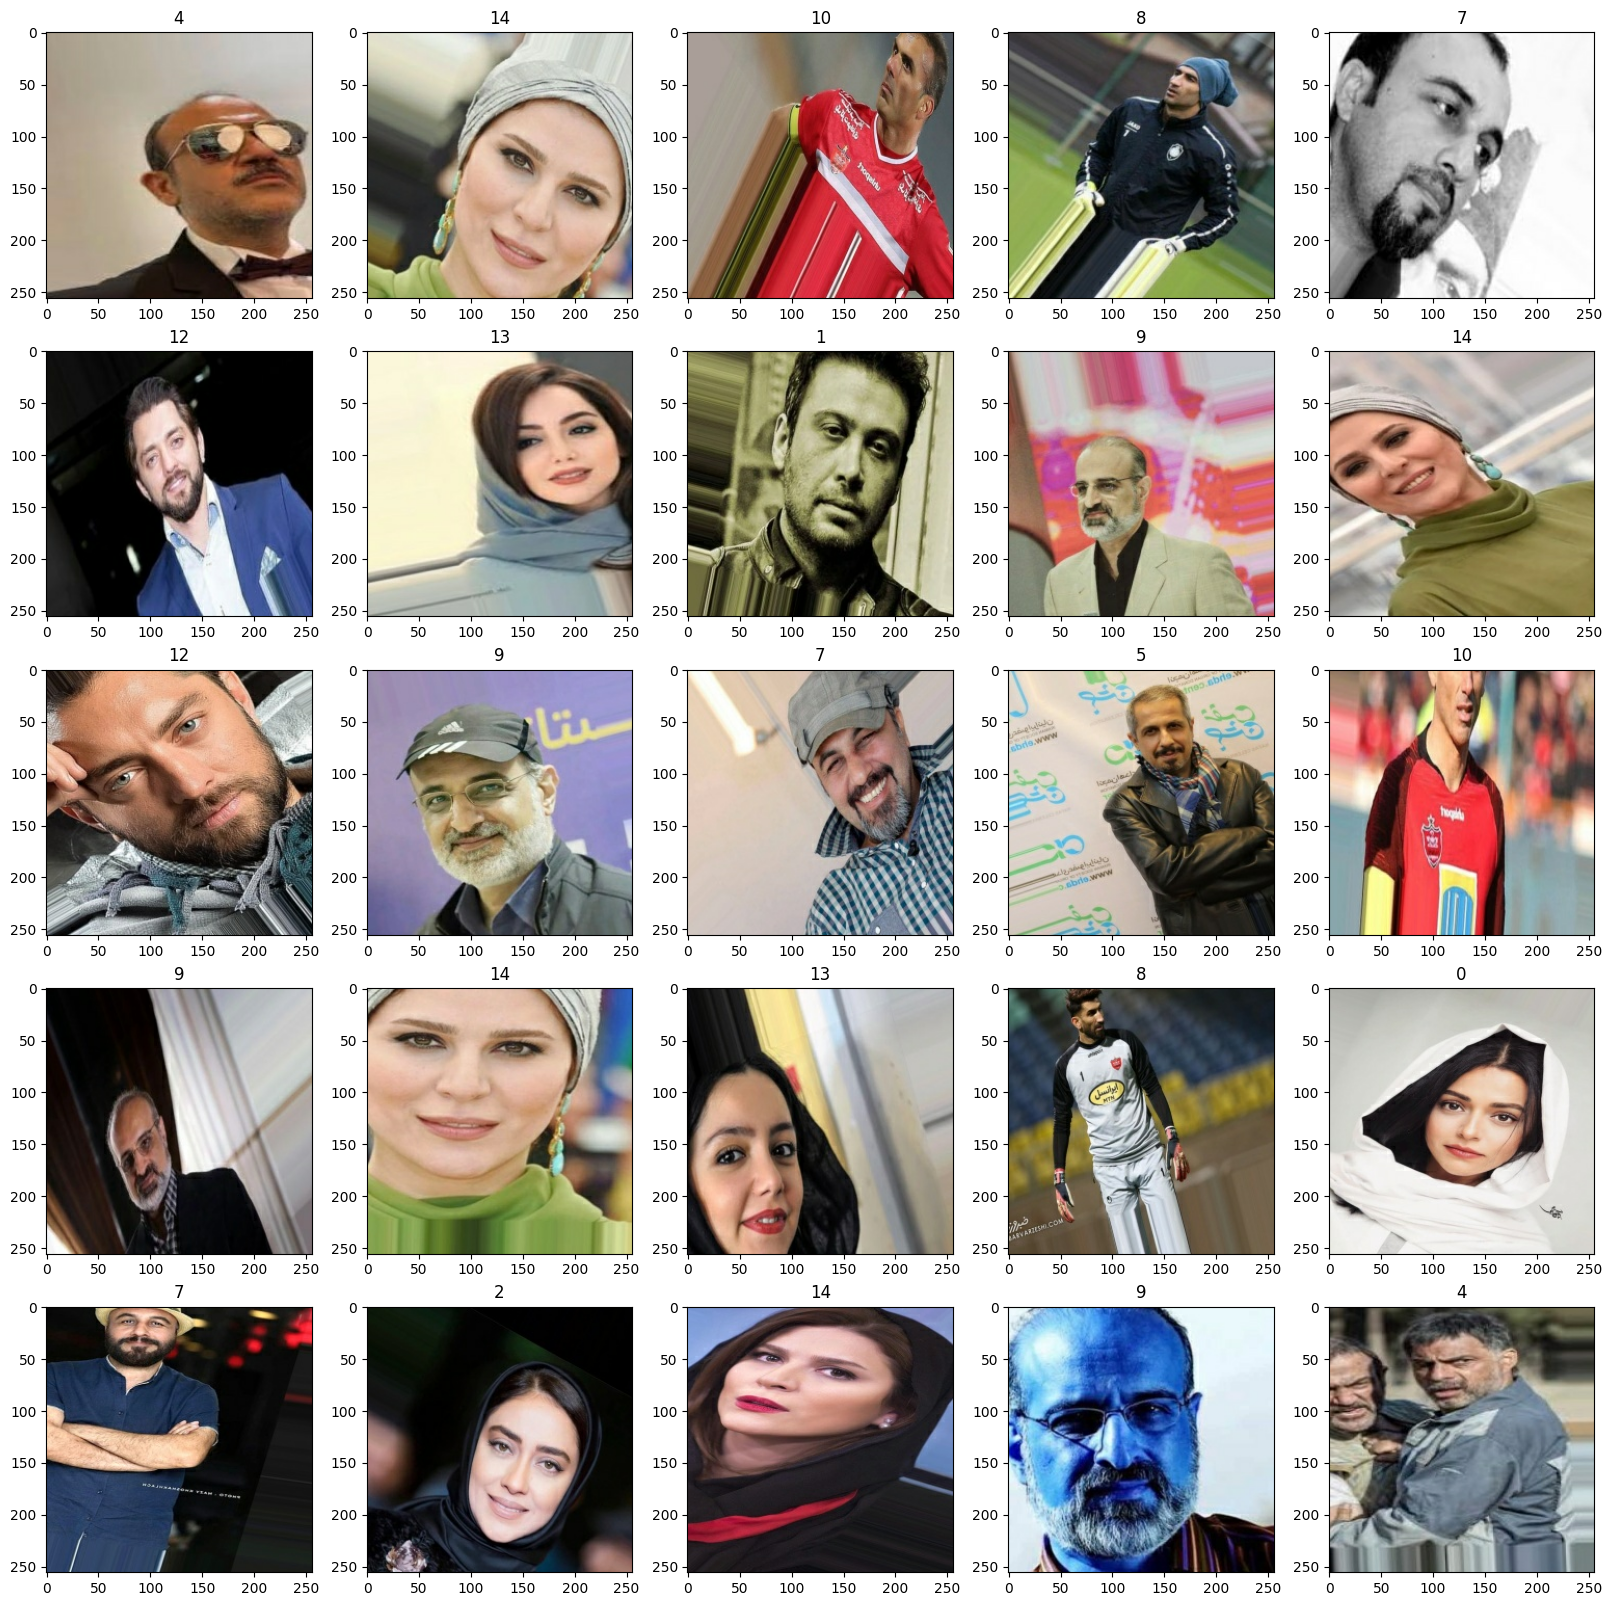

In [ ]:
# showing some of the images in the batch
fig, ax = plt.subplots(ncols=5 , nrows=5 , figsize=(20,20))
for idx, img in enumerate(batch[0][:25]):
    ax[idx//5 , idx%5].imshow(img.astype(int))
    ax[idx//5 , idx%5].title.set_text(batch[1][idx])

In [ ]:
# Define a map function to convert labels to one-hot encoded format
def preprocess_data(image, label):
    image = image / 255
    label = tf.one_hot(label, 15)
    return image, label

In [ ]:
from keras.utils import to_categorical
import tensorflow.keras.backend as K

# y_train = K.eval(y_train)
data = base_data.map(preprocess_data)
batch = data.as_numpy_iterator().next()



/usr/local/lib/python3.10/dist-packages/matplotlib/text.py:1279: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


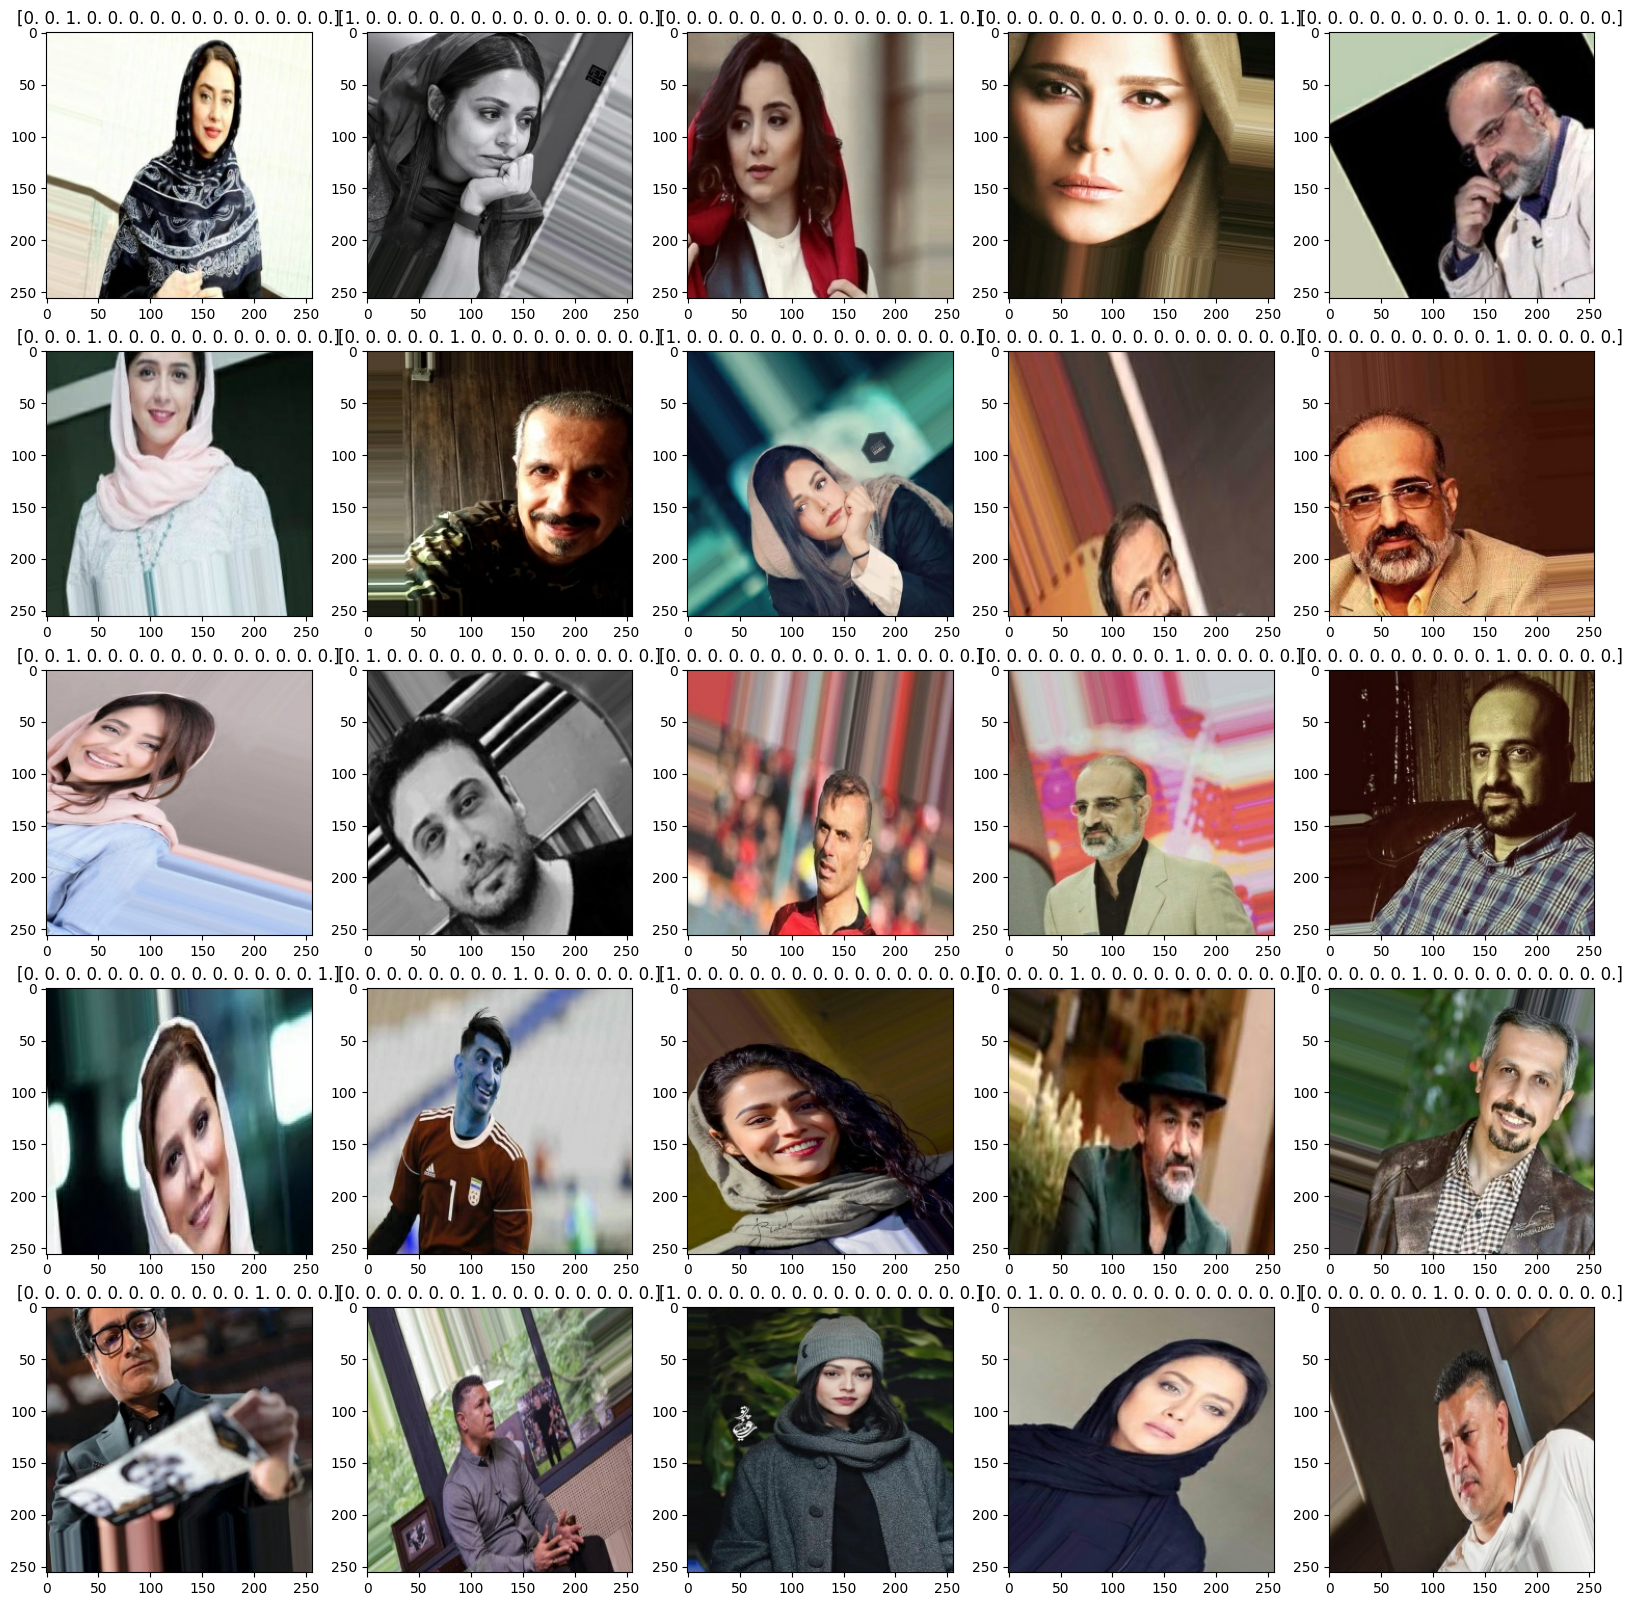

In [ ]:
# showing some of the images in the batch
fig, ax = plt.subplots(ncols=5 , nrows=5 , figsize=(20,20))
for idx, img in enumerate(batch[0][:25]):
    ax[idx//5 , idx%5].imshow(img)
    ax[idx//5 , idx%5].title.set_text(batch[1][idx])

In [ ]:
train_size = int(len(data) * 0.7)
valid_size = int(len(data) * 0.2)
test_size = int(len(data) * 0.1)

print(train_size)
print(valid_size)
print(test_size)

95
27
13


In [ ]:
train_data = data.take(train_size)
valid_data = data.skip(train_size).take(valid_size)
test_data = data.skip(train_size + valid_size).take(test_size)

In [ ]:
num_train_images = tf.data.experimental.cardinality(valid_data).numpy()
print("Number of images in train dataset:", num_train_images)

Number of images in train dataset: 27


In [ ]:
train_data_iter = test_data.as_numpy_iterator().next()
print(train_data_iter[1])

[[0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, TensorBoard

# model = Sequential()

# model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
# model.add(MaxPooling2D())
# model.add(Conv2D(32, (3,3), 1, activation='relu'))
# model.add(MaxPooling2D())
# model.add(Conv2D(16, (3,3), 1, activation='relu'))
# model.add(MaxPooling2D())
# model.add(Flatten())
# model.add(Dense(256, activation='relu'))
# model.add(Dense(4, activation='softmax'))

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam

# Model configuration
img_width, img_height, img_num_channels = 256, 256, 3
batch_size = 32
no_classes = 15  # Change this to the number of unique faces you want to recognize
no_epochs = 50
learning_rate = 0.0001
validation_split = 0.2
verbosity = 1

# Define the model
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(img_width, img_height, img_num_channels), padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, kernel_size=(3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(128, kernel_size=(3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(256, kernel_size=(3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(1024, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(no_classes, activation='softmax'))


In [ ]:
model.compile('adam', loss= "categorical_crossentropy", metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 256, 256, 32)      896       
                                                                 
 batch_normalization_5 (Bat  (None, 256, 256, 32)      128       
 chNormalization)                                                
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 128, 128, 32)      0         
 g2D)                                                            
                                                                 
 dropout_5 (Dropout)         (None, 128, 128, 32)      0         
                                                                 
 conv2d_5 (Conv2D)           (None, 128, 128, 64)      18496     
                                                                 
 batch_normalization_6 (Bat  (None, 128, 128, 64)     

In [ ]:
callbacks = [
    EarlyStopping(monitor='val_loss', patience=3),
    ModelCheckpoint(filepath='model_checkpoint.h5', monitor='val_loss', save_best_only=True),
    TensorBoard(log_dir='logs/fit/' + datetime.now().strftime("%Y%m%d-%H%M%S"))
]

In [ ]:
# Train the model
model.fit(train_data ,
          validation_data=valid_data ,
          epochs=50,
          batch_size = 32 ,
          verbose = 1 ,
          callbacks=callbacks)

Epoch 1/50
95/95 [==============================] - ETA: 0s - loss: 3.3491 - accuracy: 0.1711

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


95/95 [==============================] - 37s 258ms/step - loss: 3.3491 - accuracy: 0.1711 - val_loss: 7.9348 - val_accuracy: 0.0822
Epoch 2/50
95/95 [==============================] - 29s 300ms/step - loss: 2.6042 - accuracy: 0.2760 - val_loss: 6.2261 - val_accuracy: 0.0799
Epoch 3/50
95/95 [==============================] - 25s 259ms/step - loss: 1.9487 - accuracy: 0.4158 - val_loss: 5.9507 - val_accuracy: 0.0637
Epoch 4/50
95/95 [==============================] - 28s 298ms/step - loss: 1.7110 - accuracy: 0.4803 - val_loss: 5.1151 - val_accuracy: 0.1319
Epoch 5/50
95/95 [==============================] - 28s 294ms/step - loss: 1.2903 - accuracy: 0.5993 - val_loss: 3.6359 - val_accuracy: 0.1968
Epoch 6/50
95/95 [==============================] - 26s 276ms/step - loss: 0.8922 - accuracy: 0.7118 - val_loss: 3.2058 - val_accuracy: 0.2662
Epoch 7/50
95/95 [==============================] - 25s 266ms/step - loss: 0.5779 - accuracy: 0.8191 - val_loss: 2.4758 - val_accuracy: 0.3681
Epoch 8/50

In [ ]:
celebrity_dict = {
    6: "Ali_Daei",
    4: "Mehran_Ghafoorian",
    7: "Reza_Attaran",
    0: "sogol_khaligh",
    8: "Ali_Beyranvand",
    5: "java_Razavian",
    14: "sahar dolatshahi",
    1: "Mohsen_chavoshi",
    12: "bahram_radan",
    9: "mohammad_esfahani",
    3: "Tarane_Alidosti",
    2: "Bahare_KianAfshar",
    10: "Jalal_Hosseini",
    11: "Homayoon_Shajarian",
    13: "Nazanin_Bayati"
}

(256, 256, 3)


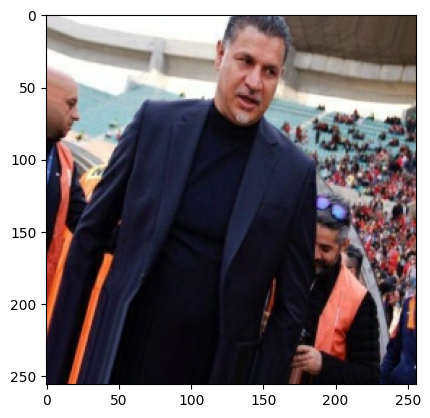

1/1 [==============================] - 0s 27ms/step
[[2.4245965e-06 6.8190570e-07 4.7606663e-06 1.1431893e-07 1.0027189e-04
  1.2115115e-06 9.9949014e-01 3.8407842e-04 6.5814430e-07 1.1122863e-06
  7.0207278e-08 4.1835929e-06 4.3727887e-06 3.7600847e-07 5.4149891e-06]]
Ali_Daei


loading the model

In [ ]:
import tensorflow as tf
import numpy as np
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import img_to_array, load_img

# Path to your saved model
model_path = '/content/drive/MyDrive/model_checkpoint.h5'

# Load the trained model
loaded_model = load_model(model_path)

(256, 256, 3)


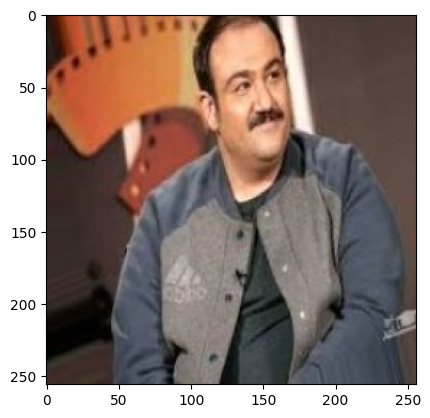

In [ ]:
test_batch = test_data.as_numpy_iterator().next()
print(test_batch[0][1].shape)
plt.imshow(test_batch[0][1])
plt.show()

In [ ]:
import cv2

image = cv2.imread(r"/content/radan5.jpg")
image = cv2.resize(image , (256 , 256))
image = image / 255
result = loaded_model.predict(np.expand_dims(image , 0))
print(result)
print(celebrity_dict[np.argmax(result)])

1/1 [==============================] - 0s 17ms/step
[[1.3800336e-09 4.9205255e-08 2.1916041e-10 6.2061110e-07 1.1402480e-08
  4.1528260e-08 7.8245049e-10 1.0118577e-09 1.8684894e-07 2.7069334e-06
  2.7379841e-05 1.5359671e-08 9.9996889e-01 2.4321739e-08 1.2419990e-07]]
bahram_radan


In [ ]:
tf.__version__

'2.15.0'